In [1]:
import networkx as nx
import TeDyNetSetPlus as tdns
# import matplotlib.pyplot as plt

In [2]:
edgelist = [
        (1,2, {'t': 1, 'w': 2}),
        (1,3, {'t': 2, 'w': 3}),
        (4,5, {'t': 4, 'w': 5}),
        (4,6, {'t': 5, 'w': 3}),
        (3,2, {'t': 6, 'w': 4}),
        (2,7, {'t': 7, 'w': 5}),
        (2,8, {'t': 8, 'w': 6}),
        (8,9, {'t': 9, 'w': 7}),
        (8,10, {'t': 10, 'w': 3}),
    ]
G = tdns.TemporalTransactionGraph()
for u, v, attr in edgelist:
    G.add_edge(u, v, attr['t'], attr['w'])

G.add_edge(7, 1, 11, 7)
print("\n[RESULT] Cycles detected during last edge:")
for cycle in G.get_cycles_during_last_edge():
    print(" → ".join(f"{u}->{v}@{t}[{w}]" for u, v, t, w in cycle))
print(G.get_cycle_statistics())
G.print_graph()


[ADD] Edge (1 -> 2, t=1, w=2)
[INFO] Descendants of 2: set()
[INFO] Ancestors of 1: set()
[INFO] Affected nodes: {1, 2}
[SKIP] No temporal path from 2 to 1 before t=1

[ADD] Edge (1 -> 3, t=2, w=3)
[INFO] Descendants of 3: set()
[INFO] Ancestors of 1: set()
[INFO] Affected nodes: {1, 3}
[SKIP] No temporal path from 3 to 1 before t=2

[ADD] Edge (4 -> 5, t=4, w=5)
[INFO] Descendants of 5: set()
[INFO] Ancestors of 4: set()
[INFO] Affected nodes: {4, 5}
[SKIP] No temporal path from 5 to 4 before t=4

[ADD] Edge (4 -> 6, t=5, w=3)
[INFO] Descendants of 6: set()
[INFO] Ancestors of 4: set()
[INFO] Affected nodes: {4, 6}
[SKIP] No temporal path from 6 to 4 before t=5

[ADD] Edge (3 -> 2, t=6, w=4)
[INFO] Descendants of 2: set()
[INFO] Ancestors of 3: {1}
[INFO] Affected nodes: {2, 3}
[SKIP] No temporal path from 2 to 3 before t=6

[ADD] Edge (2 -> 7, t=7, w=5)
[INFO] Descendants of 7: set()
[INFO] Ancestors of 2: {1, 3}
[INFO] Affected nodes: {2, 7}
[SKIP] No temporal path from 7 to 2 befo

DiGraph with 10 nodes and 7 edges 27.0


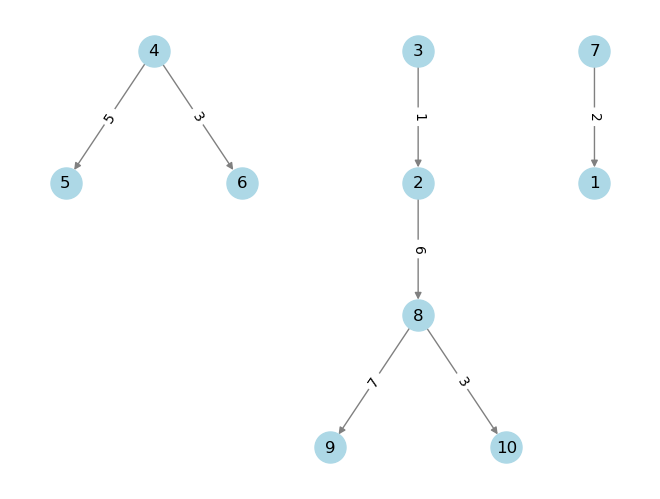

In [3]:
T = nx.DiGraph()
for u, v, attr in G.get_edgelist():
    T.add_edge(u, v, **attr)
print(T, T.size('w'))
# Uses Graphviz for tree layout
pos = nx.nx_agraph.graphviz_layout(T, prog="dot") 
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['w'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10);

In [4]:
new_edges = [
    (9, 4, 12, 3),
    (6, 11, 13, 3),
    (5, 11, 14, 3),
    (11, 3, 15, 3)
]

# This is not a temporal cycle, so it is correct to fail detecting it. 
# I will try to add some other edges to create a temporal cycle.

for source, target, time, weight in new_edges:
    cycles = []
    G.add_edge(source, target, time, weight)
    cycles = G.get_cycles_during_last_edge()
    if cycles:
        for cycle in cycles:
            print("\n[RESULT] Cycles detected during last edge:")
            print(" → ".join(f"{u}->{v}@{t}[{w}]" for u, v, t, w in cycle))

G.print_graph()



[ADD] Edge (9 -> 4, t=12, w=3)
[INFO] Descendants of 4: {5, 6}
[INFO] Ancestors of 9: {8, 2, 3}
[INFO] Affected nodes: {9, 4}
[SKIP] No temporal path from 4 to 9 before t=12

[ADD] Edge (6 -> 11, t=13, w=3)
[INFO] Descendants of 11: set()
[INFO] Ancestors of 6: {2, 3, 4, 8, 9}
[INFO] Affected nodes: {11, 6}
[SKIP] No temporal path from 11 to 6 before t=13

[ADD] Edge (5 -> 11, t=14, w=3)
[INFO] Descendants of 11: set()
[INFO] Ancestors of 5: {2, 3, 4, 8, 9}
[INFO] Affected nodes: {11, 5}
[SKIP] No temporal path from 11 to 5 before t=14

[ADD] Edge (11 -> 3, t=15, w=3)
[INFO] Descendants of 3: {2, 3, 4, 5, 6, 8, 9, 10, 11}
[INFO] Ancestors of 11: {2, 3, 4, 5, 6, 8, 9, 11}
[INFO] Affected nodes: {2, 3, 4, 5, 6, 8, 9, 11}
[SKIP] No temporal path from 3 to 11 before t=15

[GRAPH] Current Edgelist:
(2 -> 8, t=8, w=6)
(3 -> 2, t=6, w=1)
(4 -> 5, t=4, w=5)
(4 -> 6, t=5, w=3)
(5 -> 11, t=14, w=3)
(6 -> 11, t=13, w=3)
(7 -> 1, t=11, w=2)
(8 -> 9, t=9, w=7)
(8 -> 10, t=10, w=3)
(9 -> 4, t=12, w

DiGraph with 11 nodes and 11 edges 39.0


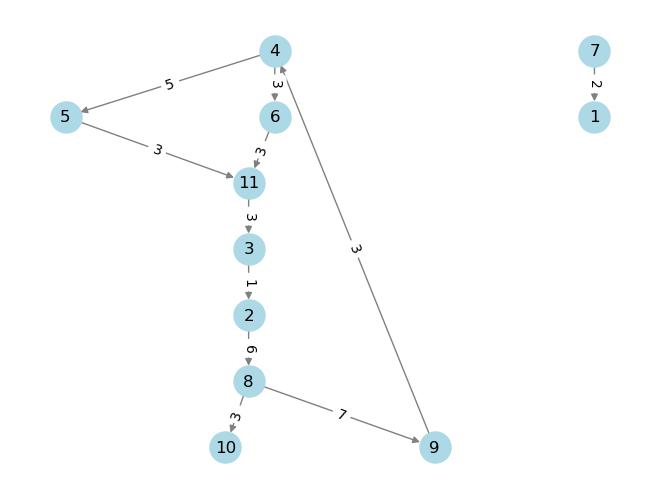

In [5]:
T = nx.DiGraph()
for u, v, attr in G.get_edgelist():
    T.add_edge(u, v, **attr)
print(T, T.size('w'))
# Uses Graphviz for tree layout
pos = nx.nx_agraph.graphviz_layout(T, prog="dot") 
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['w'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10);

In [6]:
new_edges = [
    (9, 12, 16, 3),
    (10, 12, 17, 3),
    (12, 3, 18, 3),
]

for source, target, time, weight in new_edges:
    cycles = []
    G.add_edge(source, target, time, weight)
    cycles = G.get_cycles_during_last_edge()
    if cycles:
        for cycle in cycles:
            print("\n[RESULT] Cycles detected during last edge:")
            print(" → ".join(f"{u}->{v}@{t}[{w}]" for u, v, t, w in cycle))
print(G.get_cycle_statistics())
G.print_graph()


[ADD] Edge (9 -> 12, t=16, w=3)
[INFO] Descendants of 12: set()
[INFO] Ancestors of 9: {2, 3, 4, 5, 6, 8, 9, 11}
[INFO] Affected nodes: {9, 12}
[SKIP] No temporal path from 12 to 9 before t=16

[ADD] Edge (10 -> 12, t=17, w=3)
[INFO] Descendants of 12: set()
[INFO] Ancestors of 10: {2, 3, 4, 5, 6, 8, 9, 11}
[INFO] Affected nodes: {10, 12}
[SKIP] No temporal path from 12 to 10 before t=17

[ADD] Edge (12 -> 3, t=18, w=3)
[INFO] Descendants of 3: {2, 3, 4, 5, 6, 8, 9, 10, 11, 12}
[INFO] Ancestors of 12: {2, 3, 4, 5, 6, 8, 9, 10, 11, 12}
[INFO] Affected nodes: {2, 3, 4, 5, 6, 8, 9, 10, 11, 12}
[CYCLE FOUND] [('START', 3, 0, 0), (3, 2, 6, 1), (2, 8, 8, 6), (8, 9, 9, 7), (9, 12, 16, 3), (12, 3, 18, 3)]
[RESOLVE] Resolving cycle with min weight 1

[RESULT] Cycles detected during last edge:
START->3@0[0] → 3->2@6[1] → 2->8@8[6] → 8->9@9[7] → 9->12@16[3] → 12->3@18[3]
[{'min_timestamp': 2, 'max_timestamp': 11, 'length': 4, 'min_weight': 3, 'total_weight': 19, 'avg_weight': 4.75}, {'min_timest

DiGraph with 12 nodes and 13 edges 43.0


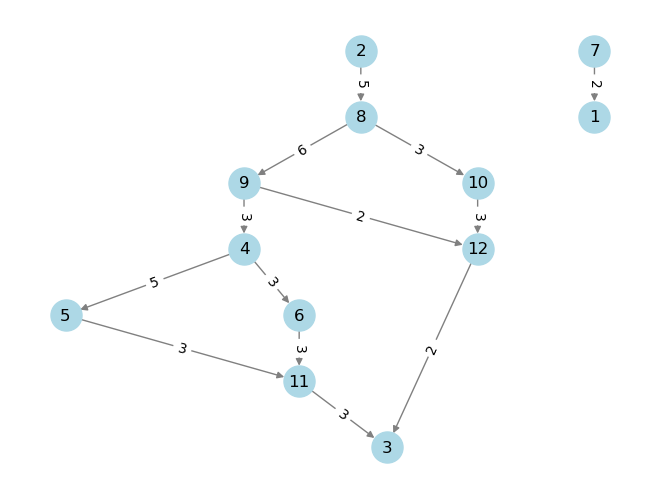

In [7]:
T = nx.DiGraph()
for u, v, attr in G.get_edgelist():
    T.add_edge(u, v, **attr)
print(T, T.size('w'))
# Uses Graphviz for tree layout
pos = nx.nx_agraph.graphviz_layout(T, prog="dot") 
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['w'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10);